In [5]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')


In [6]:
df=pd.read_csv("/content/insurance.csv")
df

,age,sex,bmi,children,smoker,region,expenses
0,19,female,27.9,0,yes,southwest,16884.92
1,18,male,33.8,1,no,southeast,1725.55
2,28,male,33.0,3,no,southeast,4449.46
3,33,male,22.7,0,no,northwest,21984.47
4,32,male,28.9,0,no,northwest,3866.86
...,...,...,...,...,...,...,...
1333,50,male,31.0,3,no,northwest,10600.55
1334,18,female,31.9,0,no,northeast,2205.98
1335,18,female,36.9,0,no,southeast,1629.83
1336,21,female,25.8,0,no,southwest,2007.95


In [7]:
#Data Exploration & Preprocessing
df.head()

,age,sex,bmi,children,smoker,region,expenses
0,19,female,27.9,0,yes,southwest,16884.92
1,18,male,33.8,1,no,southeast,1725.55
2,28,male,33.0,3,no,southeast,4449.46
3,33,male,22.7,0,no,northwest,21984.47
4,32,male,28.9,0,no,northwest,3866.86


In [8]:
df.shape

(1338, 7)

In [9]:
df.describe()

,age,bmi,children,expenses
count,1338.000000,1338.000000,1338.000000,1338.000000
mean,39.207025,30.665471,1.094918,13270.422414
std,14.049960,6.098382,1.205493,12110.011240
min,18.000000,16.000000,0.000000,1121.870000
25%,27.000000,26.300000,0.000000,4740.287500
50%,39.000000,30.400000,1.000000,9382.030000
75%,51.000000,34.700000,2.000000,16639.915000
max,64.000000,53.100000,5.000000,63770.430000


In [10]:
df.columns

Index(['age', 'sex', 'bmi', 'children', 'smoker', 'region', 'expenses'], dtype='object')

In [11]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   expenses  1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB


In [12]:
#mean value
df.select_dtypes(include=np.number).mean()

,0
age,39.207025
bmi,30.665471
children,1.094918
expenses,13270.422414


In [13]:
#weigthed mean
df.select_dtypes(include=np.number).mean(axis=1)

,0
0,4232.9550
1,444.5875
2,1128.3650
3,5510.0425
4,981.9400
...,...
1333,2671.1375
1334,563.9700
1335,421.1825
1336,513.6875


In [14]:
#median
df.select_dtypes(include=np.number).median()

,0
age,39.00
bmi,30.40
children,1.00
expenses,9382.03


In [15]:
#percentile
df.select_dtypes(include=np.number).quantile([0.25,0.5,0.75])

,age,bmi,children,expenses
0.25,27.0,26.3,0.0,4740.2875
0.50,39.0,30.4,1.0,9382.0300
0.75,51.0,34.7,2.0,16639.9150


In [16]:
#weigheted median
df.select_dtypes(include=np.number).quantile([0.25,0.5,0.75],axis=1)

,0,1,2,3,4,5,6,7,8,9,...,1328,1329,1330,1331,1332,1333,1334,1335,1336,1337
0.25,14.250,13.7500,21.750,17.0250,21.675,19.275,25.3000,21.5250,22.8500,19.350,...,17.750,29.4500,19.7750,17.250,34.2750,24.0000,13.50,13.5000,15.7500,21.825
0.50,23.450,25.9000,30.500,27.8500,30.450,28.350,39.7000,32.3500,33.4000,42.900,...,23.600,45.3000,41.3500,28.200,48.3500,40.5000,24.95,27.4500,23.4000,45.050
0.75,4242.155,456.7375,1137.115,5520.8675,990.715,962.405,2094.6475,1848.1275,1629.3525,7275.785,...,5617.085,2620.3025,3200.0425,2724.035,2891.9225,2687.6375,575.42,435.1325,521.3375,7331.090


In [17]:
#trimmed mean
from scipy.stats import trim_mean
df.select_dtypes(include=np.number).apply(lambda x:trim_mean(x,0.1),axis=0)


,0
age,39.005597
bmi,30.502052
children,0.937500
expenses,11076.019655


In [18]:
#weighted mean
from scipy.stats import trim_mean
df.select_dtypes(include=np.number).apply(lambda x:trim_mean(x,0.1),axis=1)

,0
0,4232.9550
1,444.5875
2,1128.3650
3,5510.0425
4,981.9400
...,...
1333,2671.1375
1334,563.9700
1335,421.1825
1336,513.6875


In [19]:
#deviations
df.select_dtypes(include=np.number).std()

,0
age,14.049960
bmi,6.098382
children,1.205493
expenses,12110.011240


In [20]:
#standard devation
df.select_dtypes(include=np.number).apply(lambda x:np.std(x,ddof=1),axis=0)

,0
age,14.049960
bmi,6.098382
children,1.205493
expenses,12110.011240


In [21]:
!pip install pandas==1.4.4


In [22]:
#mean absolute deviation
df.select_dtypes(include=np.number).mad()

,0
age,12.248931
bmi,4.899411
children,0.985405
expenses,9091.126526


In [23]:
#median absolute deviation from the median
df.select_dtypes(include=np.number).mad(axis=1)

,0
0,6325.98250
1,640.48125
2,1660.54750
3,8237.21375
4,1442.46000
...,...
1333,3964.70625
1334,821.00500
1335,604.32375
1336,747.13125


In [24]:
#range
df.select_dtypes(include=np.number).max()-df.select_dtypes(include=np.number).min()

,0
age,46.00
bmi,37.10
children,5.00
expenses,62648.56


In [25]:
#order statics
df.select_dtypes(include=np.number).describe()

,age,bmi,children,expenses
count,1338.000000,1338.000000,1338.000000,1338.000000
mean,39.207025,30.665471,1.094918,13270.422414
std,14.049960,6.098382,1.205493,12110.011240
min,18.000000,16.000000,0.000000,1121.870000
25%,27.000000,26.300000,0.000000,4740.287500
50%,39.000000,30.400000,1.000000,9382.030000
75%,51.000000,34.700000,2.000000,16639.915000
max,64.000000,53.100000,5.000000,63770.430000


In [26]:
#interquartile range
df.select_dtypes(include=np.number).quantile(0.75)-df.select_dtypes(include=np.number).quantile(0.25)

,0
age,24.0000
bmi,8.4000
children,2.0000
expenses,11899.6275


In [27]:
#IQR
from scipy.stats import iqr
df.select_dtypes(include=np.number).apply(iqr,axis=0)


,0
age,24.0000
bmi,8.4000
children,2.0000
expenses,11899.6275


In [28]:
#2. Visual Exploration
# Step 3: Explore the correlation between numerical features
#Correlation Matrix: Calculate and visualize the correlation matrix to see how the different features relate to each other, particularly focusing on how they correlate with expenses (the dependent variable).
df.select_dtypes(include=np.number).corr()


,age,bmi,children,expenses
age,1.000000,0.109341,0.042469,0.299008
bmi,0.109341,1.000000,0.012645,0.198576
children,0.042469,0.012645,1.000000,0.067998
expenses,0.299008,0.198576,0.067998,1.000000


<Axes: xlabel='expenses'>

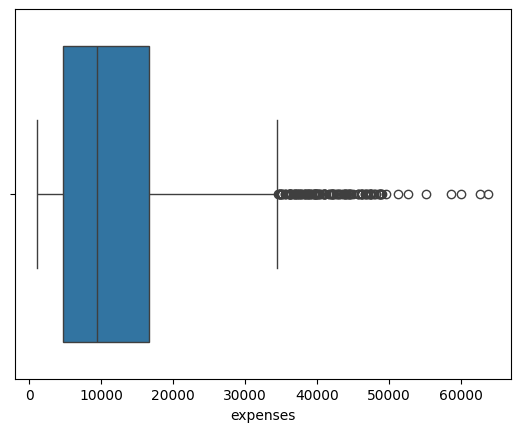

In [29]:
#boxplot
sns.boxplot(x=df['expenses'])

<Axes: xlabel='age'>

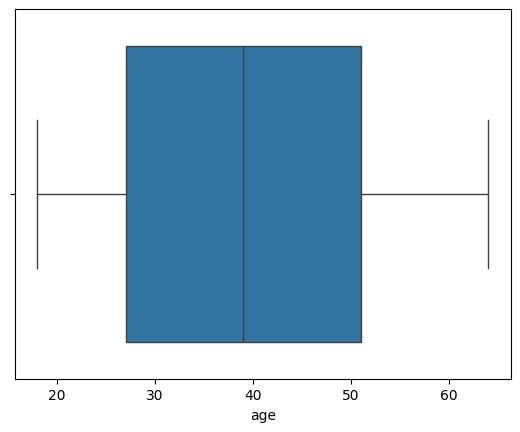

In [30]:
sns.boxplot(x=df['age'])

<Axes: xlabel='bmi'>

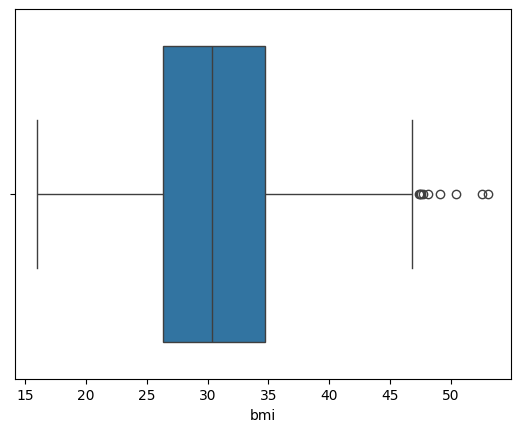

In [31]:
sns.boxplot(x=df['bmi'])

<Axes: xlabel='children'>

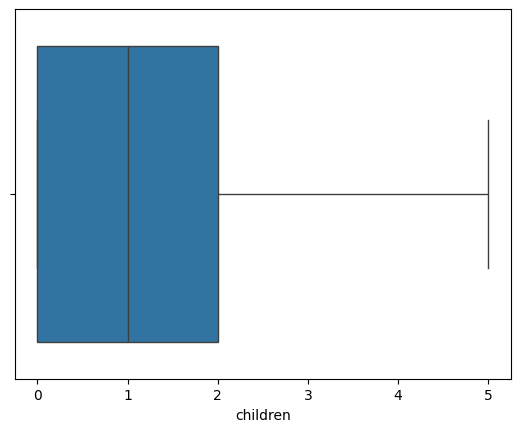

In [32]:
sns.boxplot(x=df['children'])

<Axes: xlabel='expenses'>

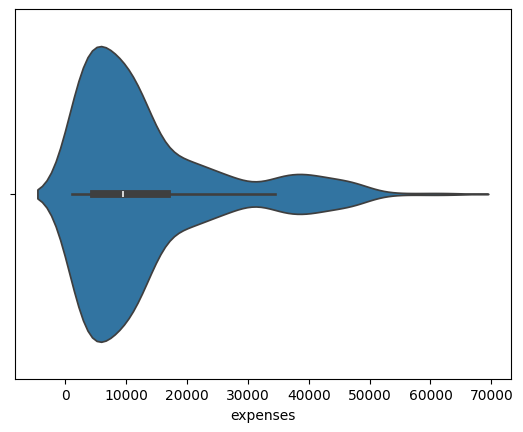

In [33]:
#Violin Plots:
sns.violinplot(x=df['expenses'])

<Axes: xlabel='age'>

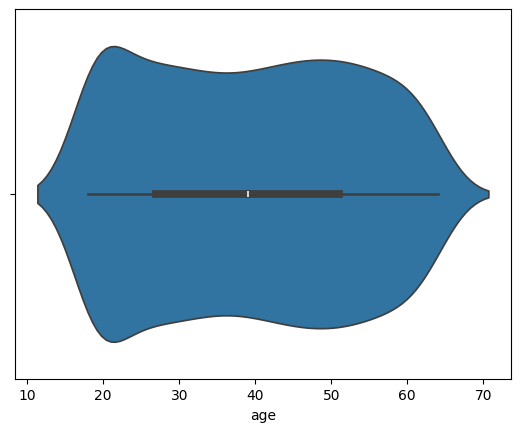

In [34]:
sns.violinplot(x=df['age'])

<Axes: xlabel='bmi'>

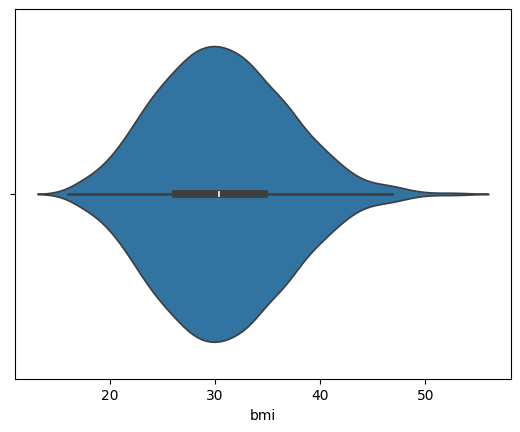

In [35]:
sns.violinplot(x=df['bmi'])

<Axes: xlabel='children'>

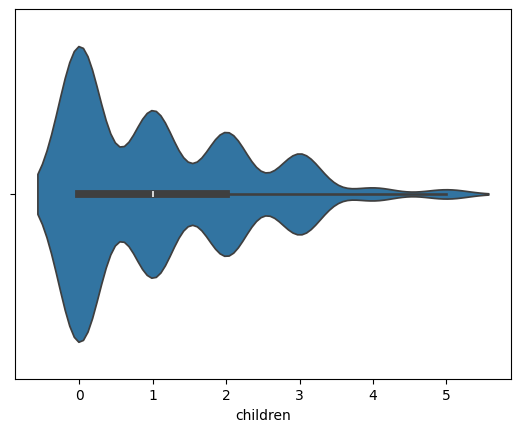

In [36]:
sns.violinplot(x=df['children'])

<Axes: xlabel='expenses'>

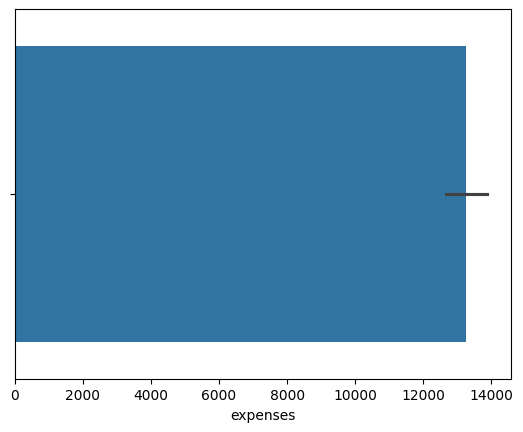

In [37]:
sns.barplot(x=df['expenses'])

<Axes: xlabel='age'>

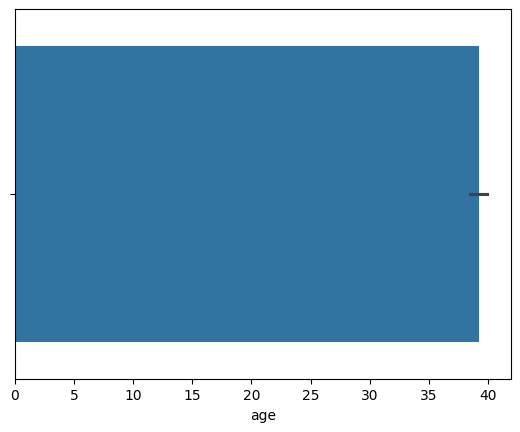

In [38]:
sns.barplot(x=df['age'])

<Axes: xlabel='bmi'>

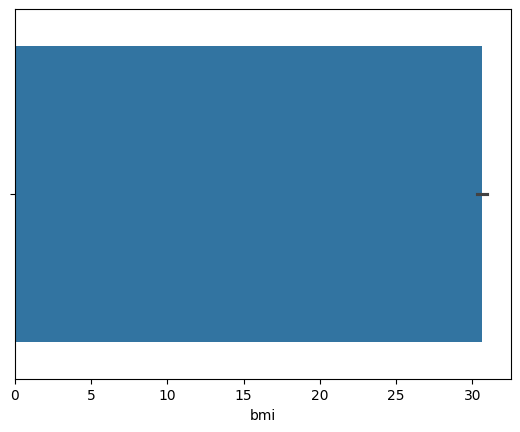

In [39]:
sns.barplot(x=df['bmi'])

<Axes: xlabel='children'>

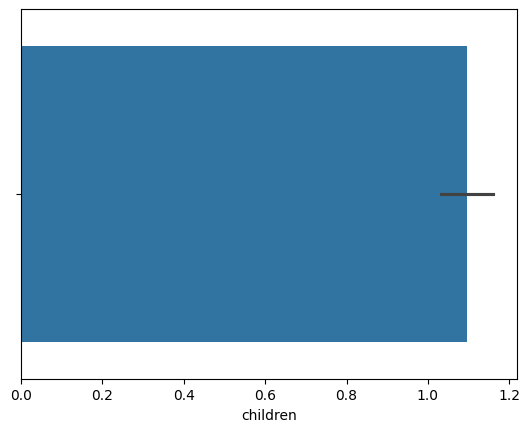

In [40]:
sns.barplot(x=df['children'])

<Axes: >

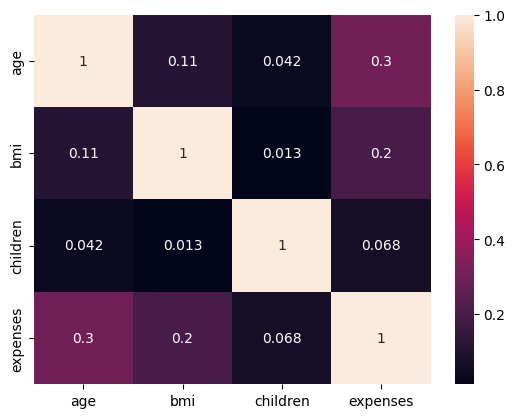

In [41]:
#correlation matrix
sns.heatmap(df.corr(),annot=True)

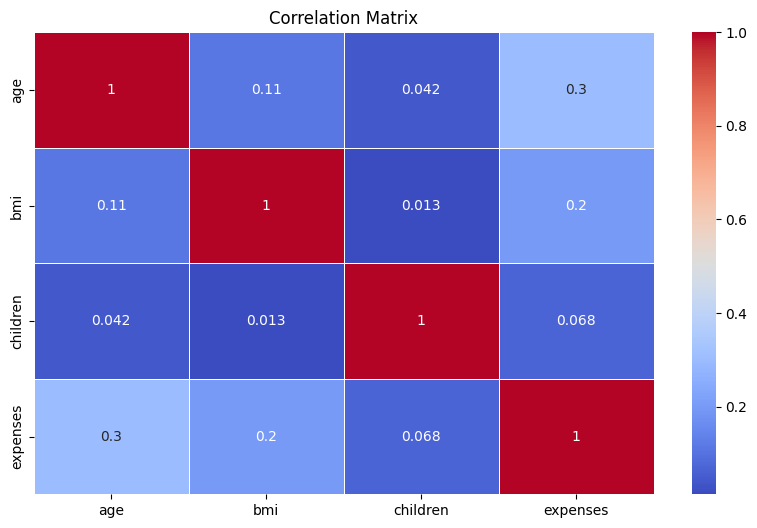

In [42]:
correlation_matrix=df.corr()
plt.figure(figsize=(10, 6))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', linewidths=0.5)
plt.title('Correlation Matrix')
plt.show()


array([[<Axes: title={'center': 'age'}>, <Axes: title={'center': 'bmi'}>],
       [<Axes: title={'center': 'children'}>,
        <Axes: title={'center': 'expenses'}>]], dtype=object)

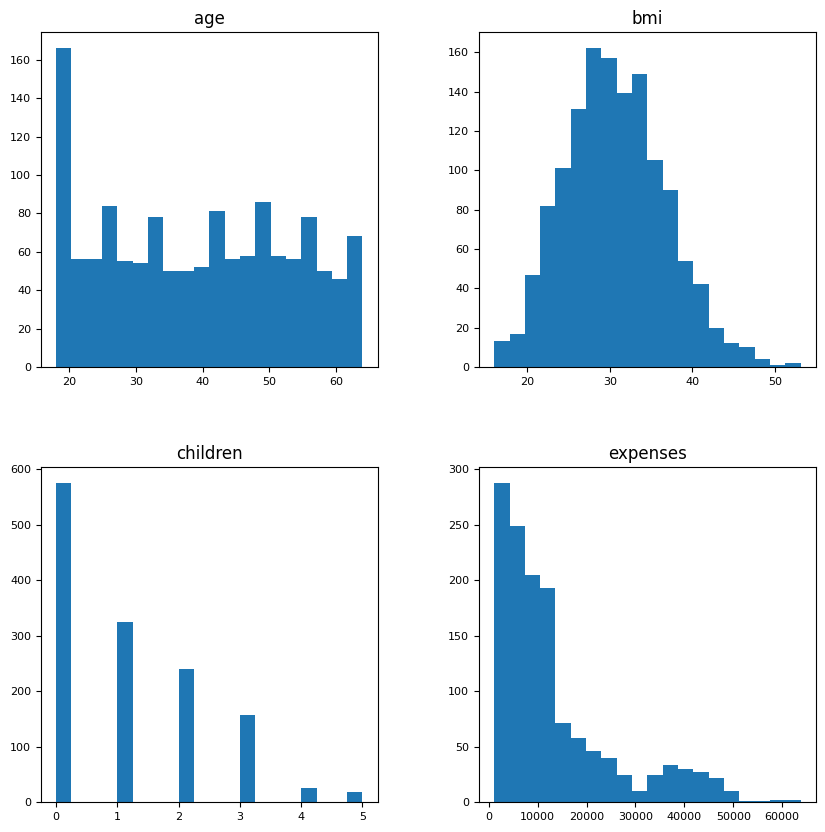

In [43]:
#histrgram
df.hist(figsize=(10,10),bins=20,xlabelsize=8,ylabelsize=8,grid=False)


<Axes: xlabel='expenses', ylabel='Density'>

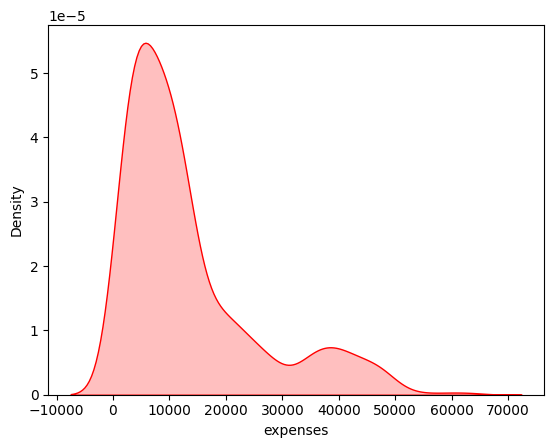

In [44]:
#density plot and estimate
sns.kdeplot(df['expenses'],shade=True,color='r',label='expenses')


<Axes: xlabel='age', ylabel='Density'>

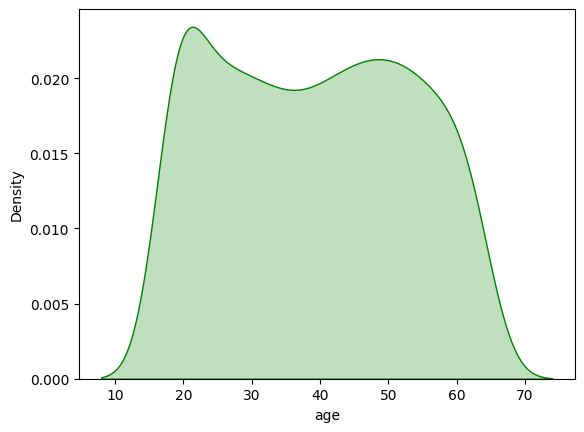

In [45]:
sns.kdeplot(df['age'],shade=True,color='g',label='age')

<Axes: xlabel='bmi', ylabel='Density'>

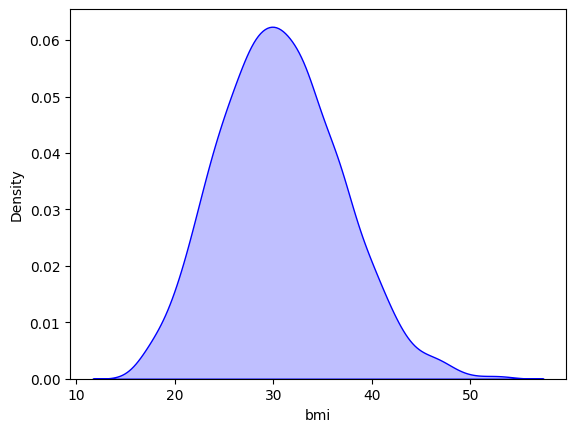

In [46]:
sns.kdeplot(df['bmi'],shade=True,color='b',label='bmi')

<Axes: xlabel='children', ylabel='Density'>

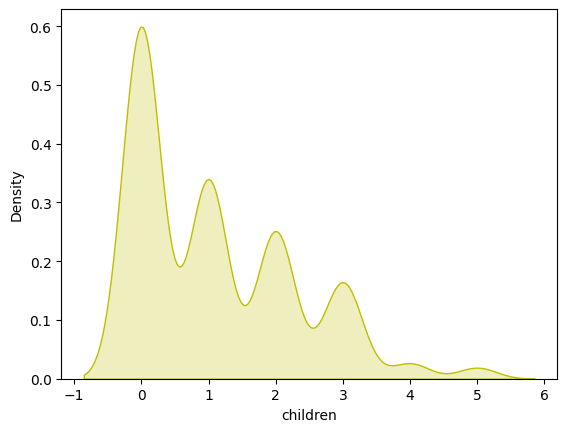

In [47]:
sns.kdeplot(df['children'],shade=True,color='y',label='children')

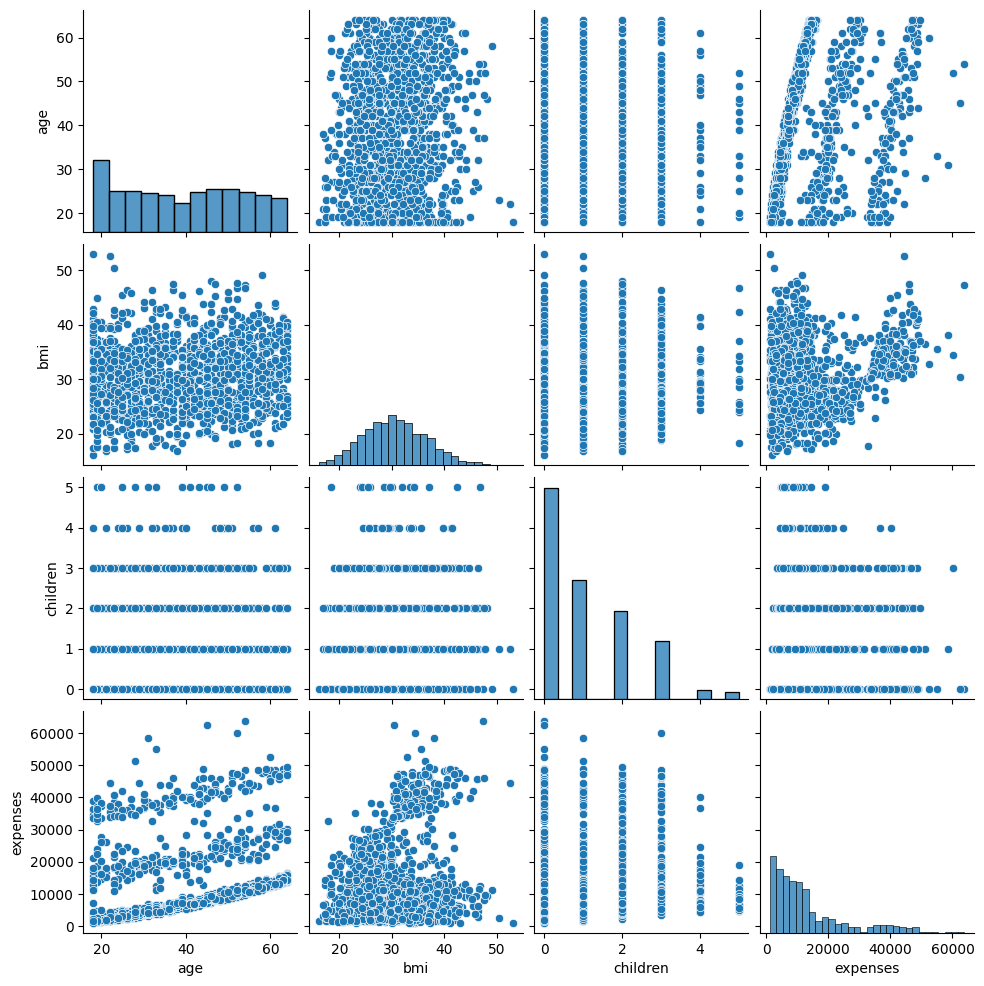

In [48]:
sns.pairplot(df[['age', 'bmi', 'children', 'expenses']])

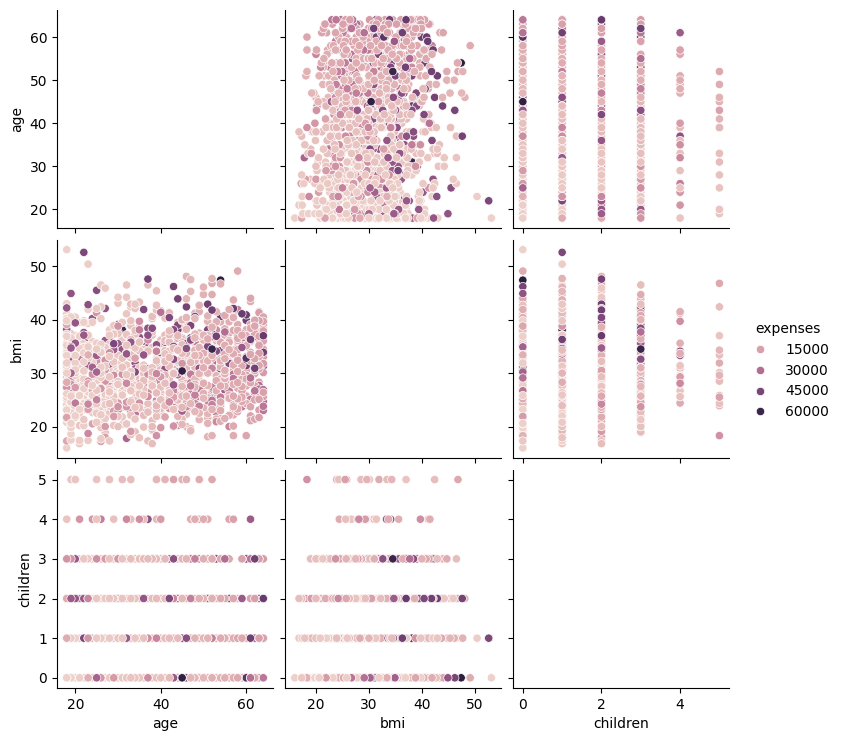

In [49]:
sns.pairplot(df,hue='expenses')

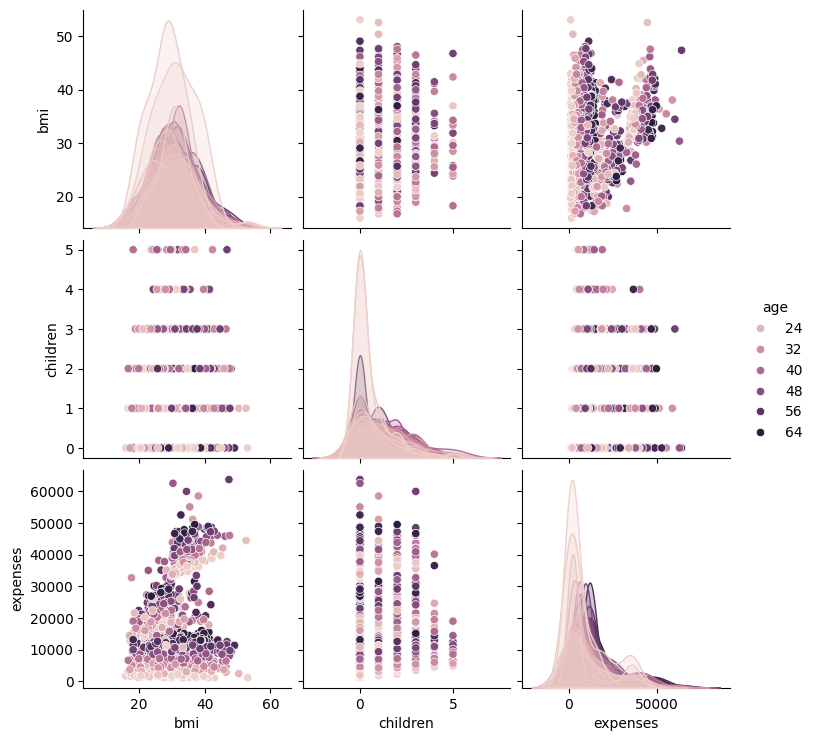

In [50]:
sns.pairplot(df,hue='age',diag_kind='kde')

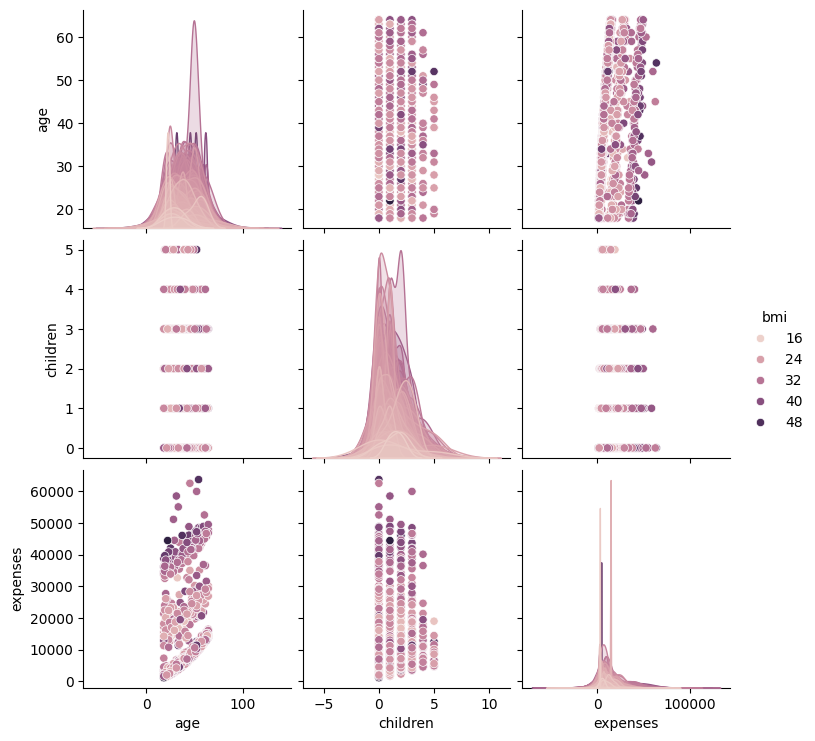

In [51]:
sns.pairplot(df, hue='bmi', diag_kind='kde')


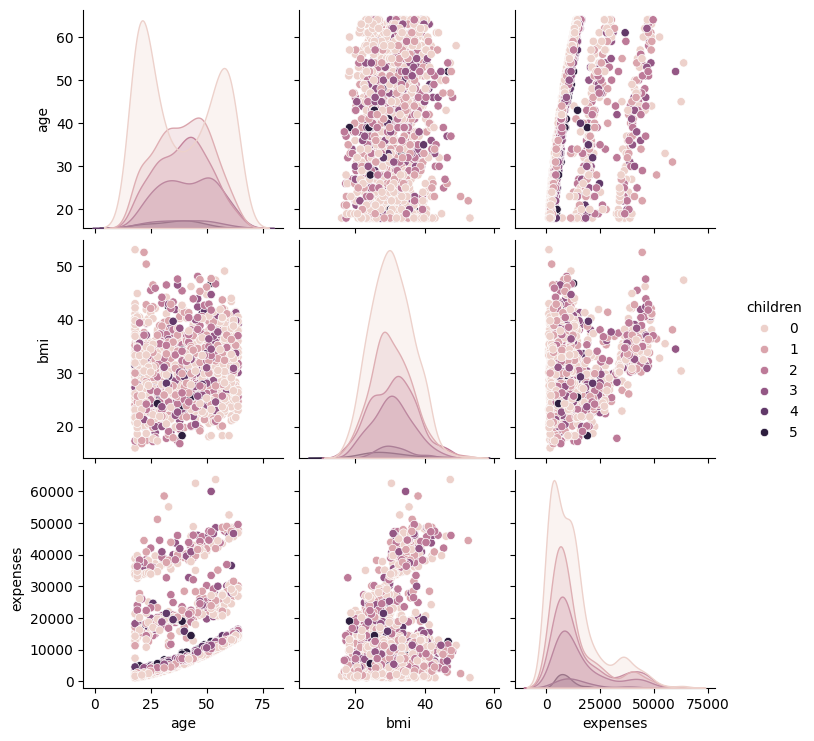

In [52]:
sns.pairplot(df, hue='children', diag_kind='kde')

<Axes: xlabel='expenses', ylabel='age'>

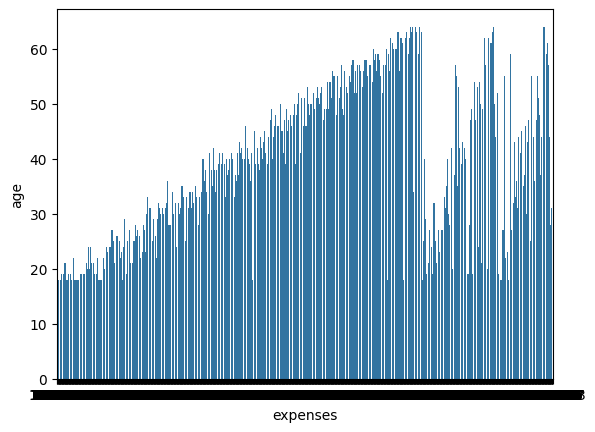

In [53]:
sns.barplot(x=df['expenses'],y=df['age'])

<Axes: xlabel='expenses', ylabel='bmi'>

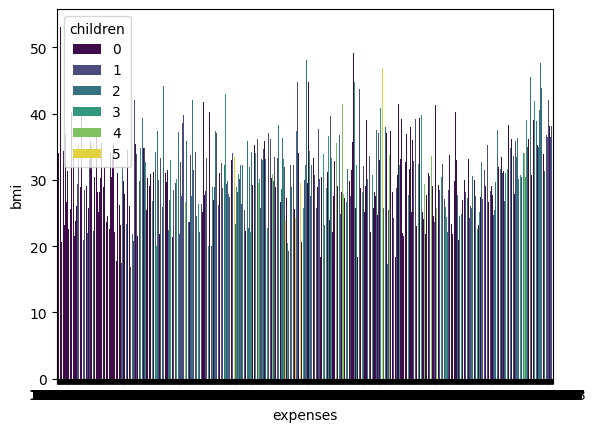

In [54]:
sns.barplot(x=df['expenses'],y=df['bmi'],hue=df['children'],palette='viridis')

<Axes: xlabel='expenses', ylabel='children'>

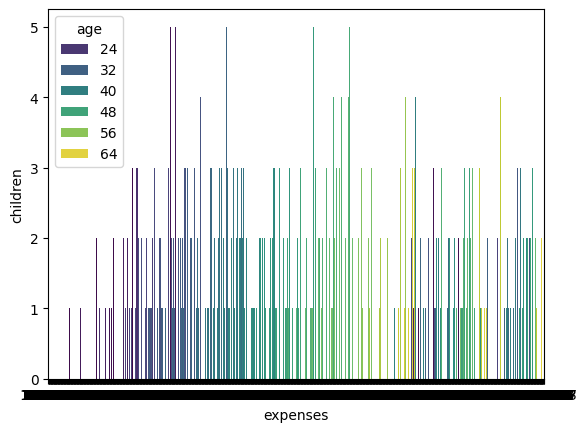

In [55]:
sns.barplot(x=df['expenses'],y=df['children'],hue=df['age'],palette='viridis')

<Axes: xlabel='age', ylabel='bmi'>

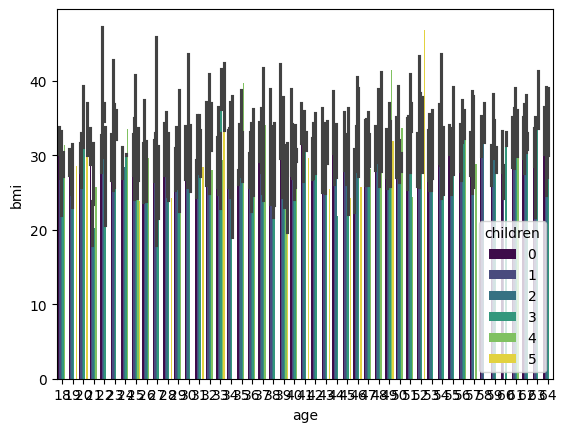

In [56]:
sns.barplot(x=df['age'],y=df['bmi'],hue=df['children'],palette='viridis')

<Axes: xlabel='age', ylabel='bmi'>

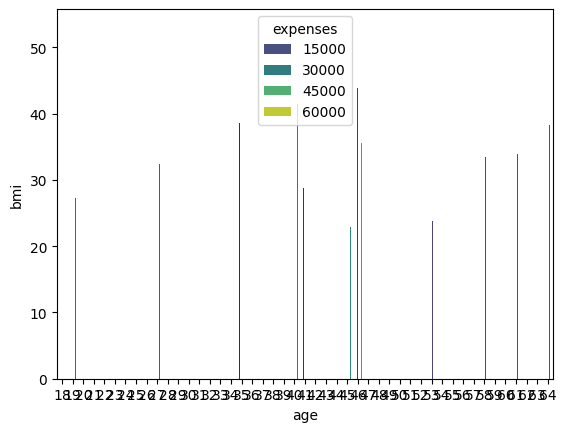

In [57]:
sns.barplot(x=df['age'],y=df['bmi'],hue=df['expenses'],palette='viridis')

<Axes: xlabel='age', ylabel='children'>

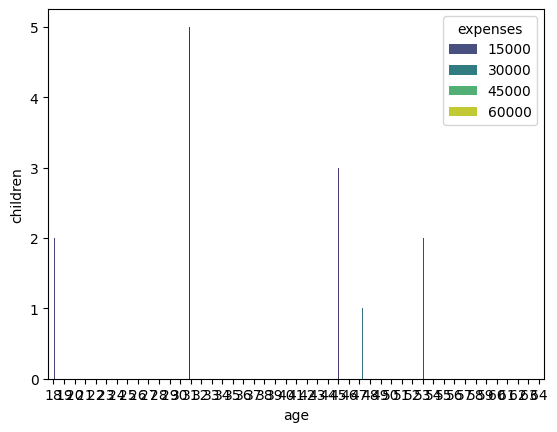

In [58]:
sns.barplot(x=df['age'],y=df['children'],hue=df['expenses'],palette='viridis')

<Axes: xlabel='expenses'>

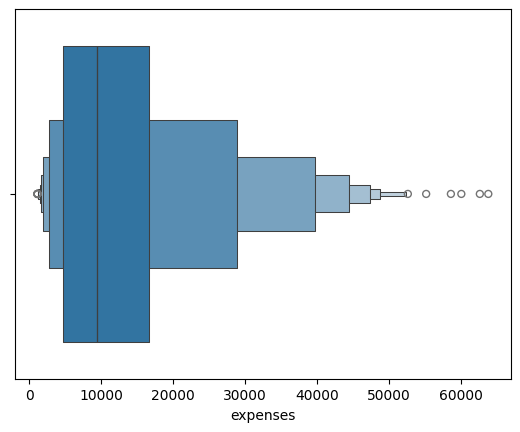

In [59]:
sns.boxenplot(x=df['expenses'])

<Axes: xlabel='age'>

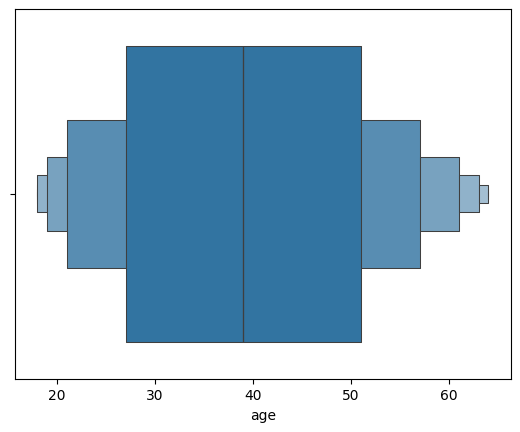

In [60]:
sns.boxenplot(x=df['age'])

<Axes: xlabel='bmi'>

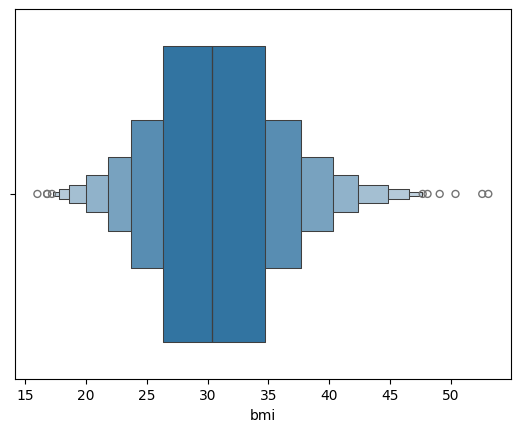

In [61]:
sns.boxenplot(x=df['bmi'])

<Axes: xlabel='children'>

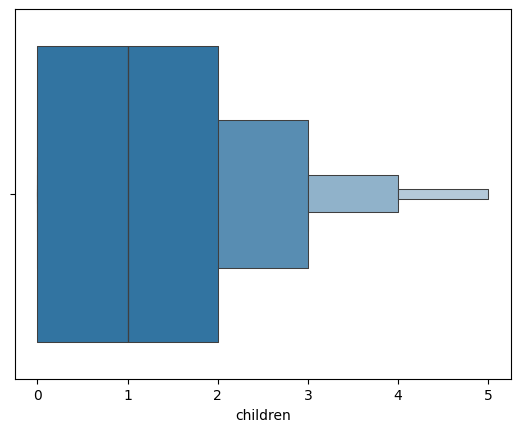

In [62]:
sns.boxenplot(x=df['children'])

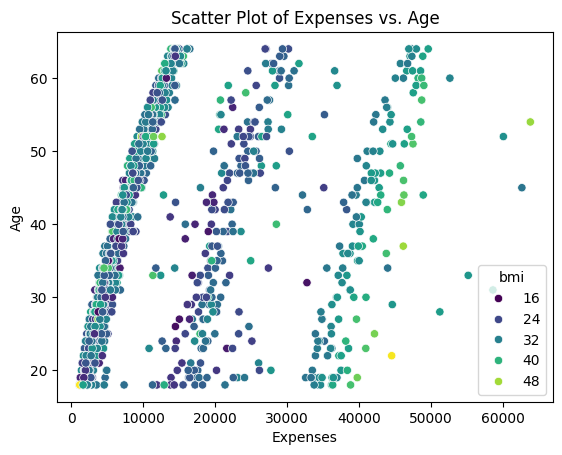

In [63]:
sns.scatterplot(x=df['expenses'],y=df['age'],hue=df['bmi'],palette='viridis')
plt.title('Scatter Plot of Expenses vs. Age')
plt.xlabel('Expenses')
plt.ylabel('Age')
plt.show()

In [64]:
#contingency table
#A counts of between two or more categorical variables
contingency_table=pd.crosstab(df['age'],df['bmi'])
contingency_table


bmi,16.0,16.8,17.2,17.3,17.4,17.5,17.7,17.8,17.9,18.0,...,46.8,47.4,47.5,47.6,47.7,48.1,49.1,50.4,52.6,53.1
age,,,,,,,,,,,,,,,,,,,,,
18,1,0,0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
19,0,0,0,0,0,1,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0
20,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
21,0,1,0,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
22,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
23,0,0,0,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
24,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
25,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
26,0,0,1,0,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [65]:
contingency_table=pd.crosstab(df['age'],df['children'])
contingency_table

children,0,1,2,3,4,5
age,,,,,,
18,51,9,6,2,1,0
19,50,11,5,1,0,1
20,17,6,3,1,0,2
21,16,5,5,1,1,0
22,18,4,2,4,0,0
23,13,6,5,4,0,0
24,23,1,1,2,1,0
25,12,6,4,3,2,1
26,10,9,7,1,1,0


In [66]:
contingency_table=pd.crosstab(df['age'],df['expenses'])
contingency_table

expenses,1121.87,1131.51,1135.94,1136.40,1137.01,1137.47,1141.45,1146.80,1149.40,1163.46,...,48885.14,48970.25,49577.66,51194.56,52590.83,55135.40,58571.07,60021.40,62592.87,63770.43
age,,,,,,,,,,,,,,,,,,,,,
18,1,1,1,1,1,1,1,1,1,1,...,0,0,0,0,0,0,0,0,0,0
19,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
20,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
21,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
22,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
23,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
24,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
25,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
26,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [67]:
contingency_table=pd.crosstab(df['bmi'],df['children'])
contingency_table

children,0,1,2,3,4,5
bmi,,,,,,
16.0,1,0,0,0,0,0
16.8,0,1,1,0,0,0
17.2,0,0,1,0,0,0
17.3,1,0,2,0,0,0
17.4,0,2,0,0,0,0
...,...,...,...,...,...,...
48.1,0,0,1,0,0,0
49.1,1,0,0,0,0,0
50.4,0,1,0,0,0,0


In [68]:
contingency_table=pd.crosstab(df['bmi'],df['expenses'])
contingency_table

expenses,1121.87,1131.51,1135.94,1136.40,1137.01,1137.47,1141.45,1146.80,1149.40,1163.46,...,48885.14,48970.25,49577.66,51194.56,52590.83,55135.40,58571.07,60021.40,62592.87,63770.43
bmi,,,,,,,,,,,,,,,,,,,,,
16.0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
16.8,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
17.2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
17.3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
17.4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
48.1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
49.1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
50.4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


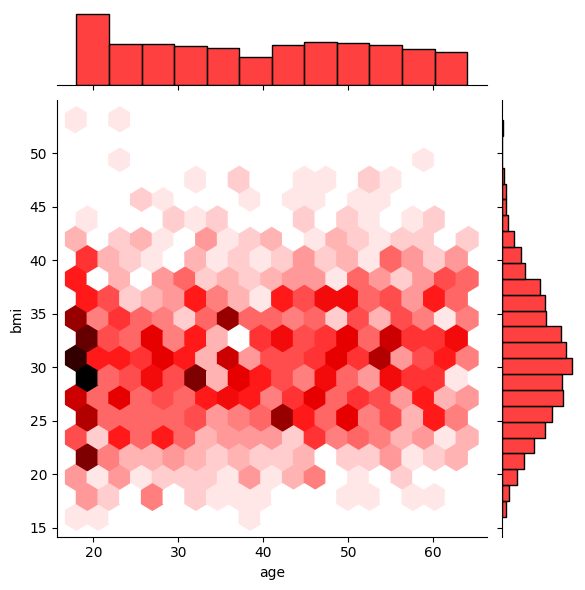

In [69]:
#hexagonal binning
#Plot of two numeric variables with the records binned intow hexagones.
sns.jointplot(x=df['age'],y=df['bmi'],kind='hex',color='r')

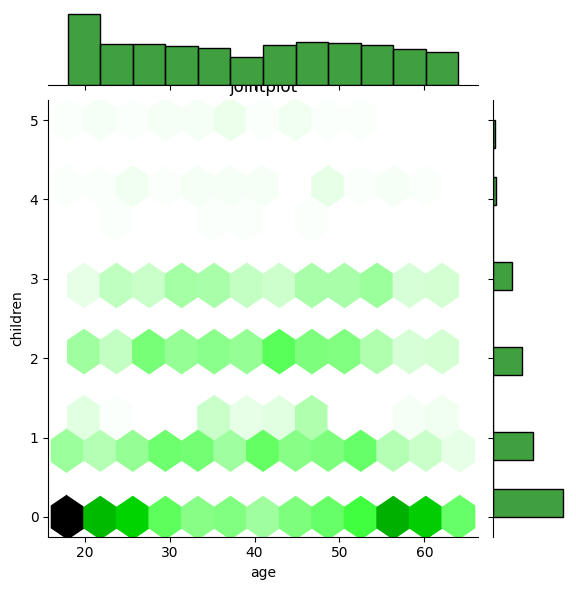

In [70]:
sns.jointplot(x=df['age'],y=df['children'],kind='hex',color='g')
plt.title('jointplot')
plt.xlabel('age')
plt.ylabel('children')
plt.show()

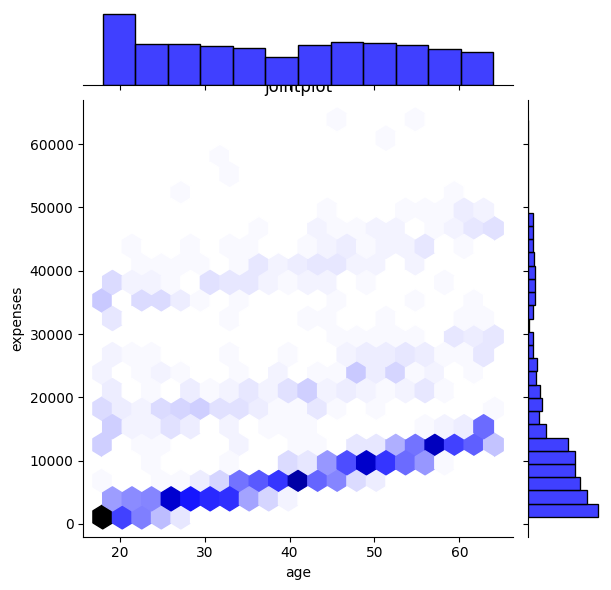

In [71]:
sns.jointplot(x=df['age'],y=df['expenses'],kind='hex',color='b')
plt.title('jointplot')
plt.xlabel('age')
plt.ylabel('expenses')
plt.show()

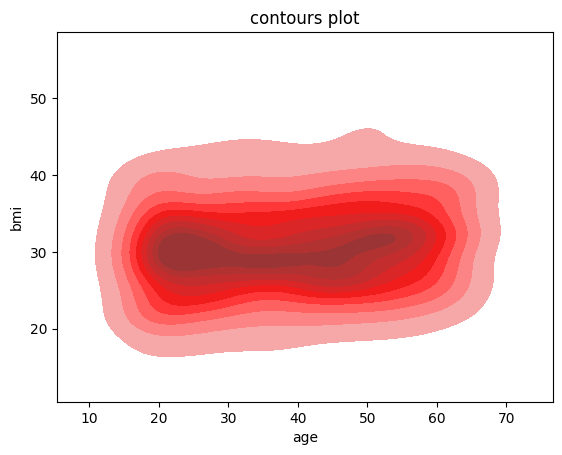

In [72]:
#contours plot
#contours plot
sns.kdeplot(x=df['age'], y=df['bmi'], shade=True, color='r')
plt.title('contours plot')
plt.xlabel('age')
plt.ylabel('bmi')
plt.show()

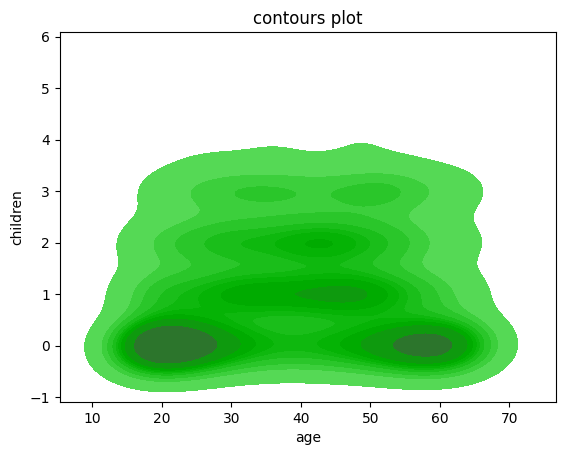

In [73]:
sns.kdeplot(x=df['age'], y=df['children'], shade=True, color='g')
plt.title('contours plot')
plt.xlabel('age')
plt.ylabel('children')
plt.show()

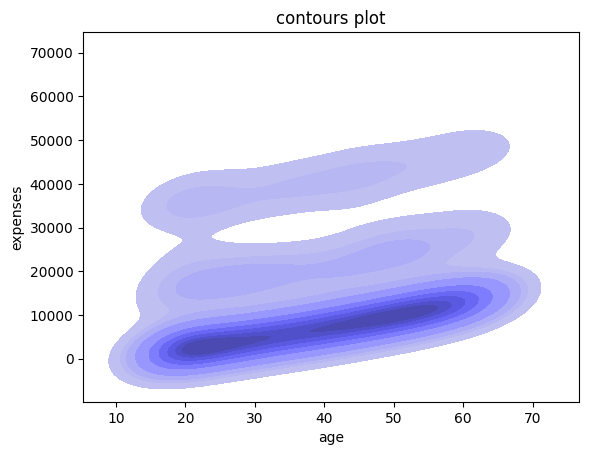

In [74]:
sns.kdeplot(x=df['age'], y=df['expenses'], shade=True, color='b')
plt.title('contours plot')
plt.xlabel('age')
plt.ylabel('expenses')
plt.show()

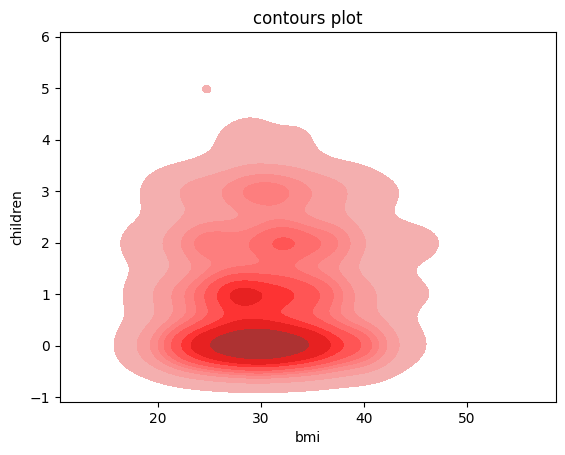

In [75]:
sns.kdeplot(x=df['bmi'], y=df['children'], shade=True, color='r')
plt.title('contours plot')
plt.xlabel('bmi')
plt.ylabel('children')
plt.show()

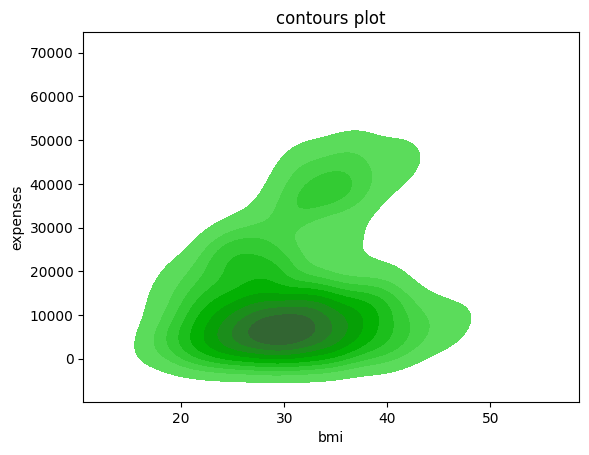

In [76]:
sns.kdeplot(x=df['bmi'], y=df['expenses'], shade=True, color='g')
plt.title('contours plot')
plt.xlabel('bmi')
plt.ylabel('expenses')
plt.show()

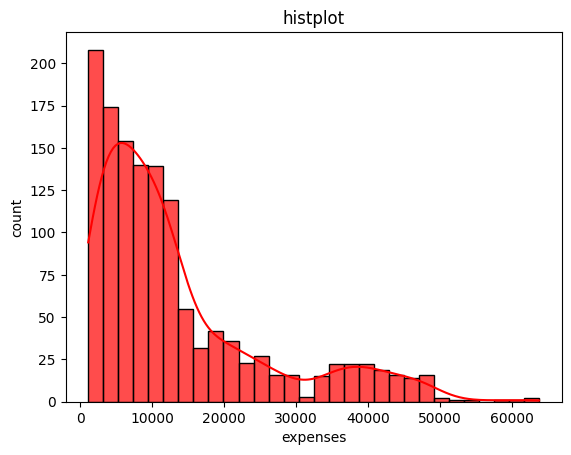

In [77]:
sns.histplot(df['expenses'],kde=True,color='r',label='expenses',alpha=0.7)
plt.title('histplot')
plt.xlabel('expenses')
plt.ylabel('count')
plt.show()

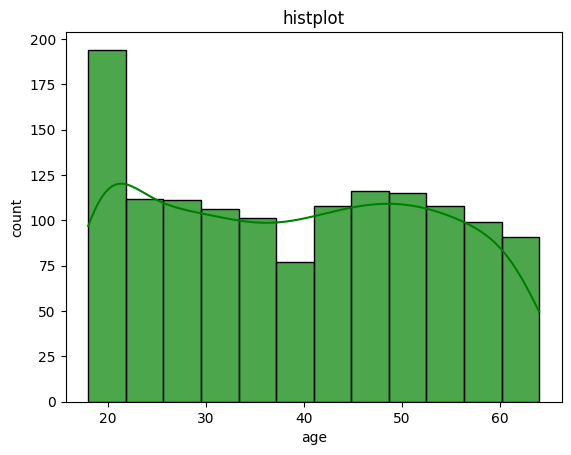

In [78]:
sns.histplot(df['age'],kde=True,color='g',label='age',alpha=0.7)
plt.title('histplot')
plt.xlabel('age')
plt.ylabel('count')
plt.show()

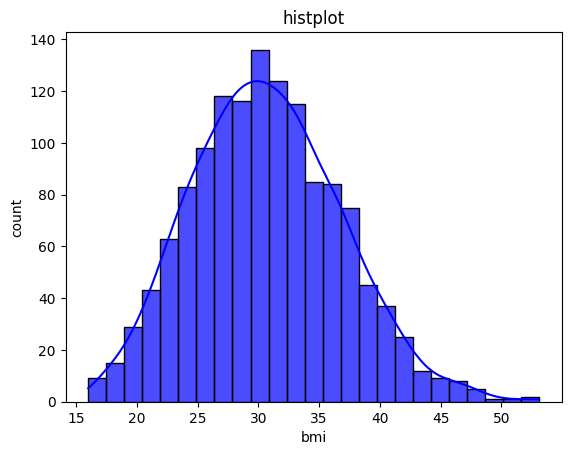

In [79]:
sns.histplot(df['bmi'],kde=True,color='b',label='bmi',alpha=0.7)
plt.title('histplot')
plt.xlabel('bmi')
plt.ylabel('count')
plt.show()

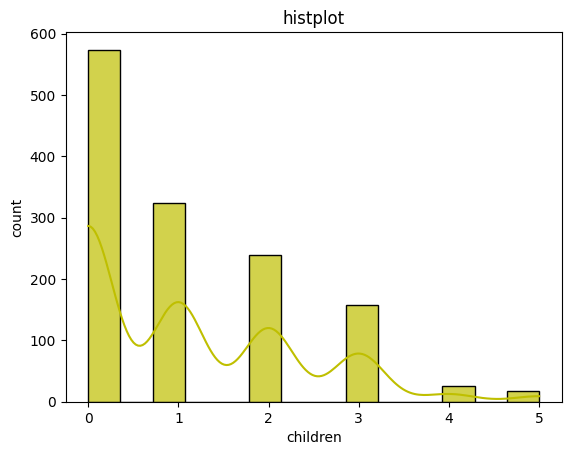

In [80]:
sns.histplot(df['children'],kde=True,color='y',label='children',alpha=0.7)
plt.title('histplot')
plt.xlabel('children')
plt.ylabel('count')
plt.show()

In [81]:
#Encode categorical variables if necessary
from sklearn.preprocessing import LabelEncoder, OneHotEncoder


In [82]:
#Identify Categorical Features
categorical_features = df.select_dtypes(include=['object']).columns
categorical_features

Index(['sex', 'smoker', 'region'], dtype='object')

In [83]:
df.head()

,age,sex,bmi,children,smoker,region,expenses
0,19,female,27.9,0,yes,southwest,16884.92
1,18,male,33.8,1,no,southeast,1725.55
2,28,male,33.0,3,no,southeast,4449.46
3,33,male,22.7,0,no,northwest,21984.47
4,32,male,28.9,0,no,northwest,3866.86


In [84]:
# Initialize LabelEncoder
label_encoder = LabelEncoder()
# Apply Label Encoding to 'sex' and 'smoker'
df['sex'] = label_encoder.fit_transform(df['sex'])
df['smoker'] = label_encoder.fit_transform(df['smoker'])
df['region'] = label_encoder.fit_transform(df['region'])
df.head()

,age,sex,bmi,children,smoker,region,expenses
0,19,0,27.9,0,1,3,16884.92
1,18,1,33.8,1,0,2,1725.55
2,28,1,33.0,3,0,2,4449.46
3,33,1,22.7,0,0,1,21984.47
4,32,1,28.9,0,0,1,3866.86


In [85]:
df['sex'].value_counts()


,sex
1,676
0,662


In [86]:
df['smoker'].value_counts()


,smoker
0,1064
1,274


In [87]:
df['region'].value_counts()


,region
2,364
3,325
1,325
0,324


In [88]:
df.head()

,age,sex,bmi,children,smoker,region,expenses
0,19,0,27.9,0,1,3,16884.92
1,18,1,33.8,1,0,2,1725.55
2,28,1,33.0,3,0,2,4449.46
3,33,1,22.7,0,0,1,21984.47
4,32,1,28.9,0,0,1,3866.86


In [89]:
#Prepare data for regression
#check for missing values
df.isnull().sum()


,0
age,0
sex,0
bmi,0
children,0
smoker,0
region,0
expenses,0


In [90]:
#Select predictors (X) and target variable (y)
X = df.drop('expenses', axis=1)
y = df['expenses']

In [91]:
y

,expenses
0,16884.92
1,1725.55
2,4449.46
3,21984.47
4,3866.86
...,...
1333,10600.55
1334,2205.98
1335,1629.83
1336,2007.95


In [108]:
#Prepare data for regression
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler


In [110]:
#Select predictors (X) and target variable (y)
X = df.drop(['age', 'bmi', 'children', 'sex', 'smoker', 'region'], axis=1)
y = df['expenses']


In [111]:
y

,expenses
0,16884.92
1,1725.55
2,4449.46
3,21984.47
4,3866.86
...,...
1333,10600.55
1334,2205.98
1335,1629.83
1336,2007.95


In [113]:
X

,expenses
0,16884.92
1,1725.55
2,4449.46
3,21984.47
4,3866.86
...,...
1333,10600.55
1334,2205.98
1335,1629.83
1336,2007.95


In [114]:
#Standardize the features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)
X_scaled

array([[ 0.29858346],
       [-0.95368938],
       [-0.72867485],
       ...,
       [-0.96159654],
       [-0.93036111],
       [ 1.31105343]])

In [116]:
#Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)
X_train

array([[-0.33675499],
       [-0.39120716],
       [ 1.14390853],
       ...,
       [-0.11063517],
       [ 2.71307491],
       [-0.25242957]])

In [117]:
X_test

array([[-0.3449141 ],
       [-0.66071227],
       [ 1.3267174 ],
       [-0.32782928],
       [ 1.69178415],
       [-0.72150454],
       [-0.92132471],
       [ 0.07766046],
       [-0.78789015],
       [-0.24831574],
       [ 0.41211051],
       [-0.49677501],
       [-0.77014778],
       [ 2.71618177],
       [ 2.92455343],
       [ 2.55522415],
       [-0.2866083 ],
       [ 2.45338602],
       [-0.41611901],
       [ 0.70248302],
       [-0.67657945],
       [-0.48151085],
       [-0.9924528 ],
       [-0.86864776],
       [-0.18048285],
       [-0.19383713],
       [-0.05169825],
       [ 0.45717521],
       [-0.29363404],
       [-1.00276135],
       [ 0.21134201],
       [-0.11794673],
       [-0.92932026],
       [-0.62591399],
       [-0.85633351],
       [-0.48094086],
       [-0.88163691],
       [-0.49008135],
       [ 0.87706008],
       [ 2.10142408],
       [-0.70898625],
       [-0.87787911],
       [-0.13186522],
       [-0.09462094],
       [-0.69228308],
       [-0

In [118]:
#Train the multiple linear regression model
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error


In [121]:
model=LinearRegression()
model.fit(X_train,y_train)


LinearRegression()

In [123]:
#Make predictions and evaluate the model
y_pred = model.predict(X_test)
y_pred


array([ 9095.07,  5272.18, 29330.98,  9301.89, 33750.29,  4536.26,
        2117.34, 14210.54,  3732.63, 10264.44, 18259.22,  7256.72,
        3947.41, 46151.12, 48673.56, 44202.65,  9800.89, 42969.85,
        8233.1 , 21774.32,  5080.1 ,  7441.5 ,  1256.3 ,  2755.02,
       11085.59, 10923.93, 12644.59, 18804.75,  9715.84,  1131.51,
       15828.82, 11842.62,  2020.55,  5693.43,  2904.09,  7448.4 ,
        2597.78,  7337.75, 23887.66, 38709.18,  4687.8 ,  2643.27,
       11674.13, 12124.99,  4890.  , 12333.83,  3579.83,  4391.65,
       42124.52,  4463.21, 13887.2 ,  1719.44, 28476.73,  1708.93,
       10594.23, 25333.33,  3645.09, 38746.36, 11848.14, 10564.88,
       13880.95,  4753.64, 27941.29,  8017.06, 23045.57,  4133.64,
       17942.11, 25992.82,  3594.17,  1682.6 ,  6079.67,  9411.01,
        8283.68,  6338.08,  7152.67,  4889.04,  4846.92, 11454.02,
        4349.46,  9101.8 ,  1391.53, 28101.33,  5152.13, 38511.63,
       44501.4 , 41097.16,  4837.58, 10601.63,  8310.84, 11264

In [124]:
mse = mean_squared_error(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
print("Mean Squared Error:", mse)
print("Mean Absolute Error:", mae)
print("R-squared:", r2)


Mean Squared Error: 6.0892684738453526e-24
Mean Absolute Error: 1.494897075115578e-12
R-squared: 1.0


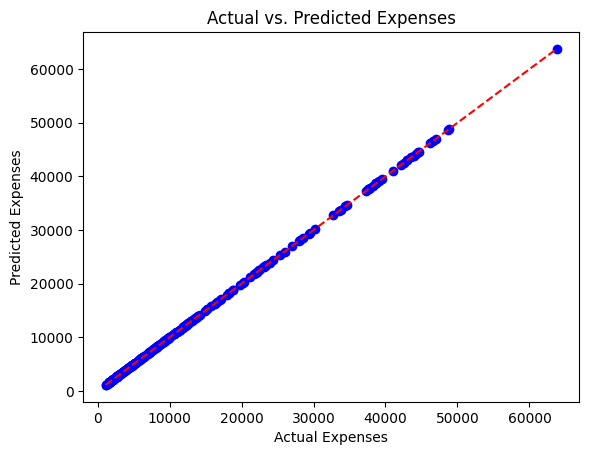

In [126]:
#Visualize actual vs predicted values
plt.scatter(y_test, y_pred, color='blue', label='Actual vs. Predicted')
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], color='red', linestyle='--', label='Perfect Prediction')
plt.xlabel('Actual Expenses')
plt.ylabel('Predicted Expenses')
plt.title('Actual vs. Predicted Expenses')
plt.show()

In [128]:
#Optionally, use statsmodels for detailed regression analysis
import statsmodels.api as sm
X_train_sm = sm.add_constant(X_train)
model_sm = sm.OLS(y_train, X_train_sm).fit()
print(model_sm.summary())
print(model_sm.params)
print(model_sm.pvalues)
print(model_sm.rsquared)
print(model_sm.rsquared_adj)
print(model_sm.aic)
print(model_sm.bic)
print(model_sm.f_pvalue)
print(model_sm.f_test)



                            OLS Regression Results                            
Dep. Variable:               expenses   R-squared:                       1.000
Model:                            OLS   Adj. R-squared:                  1.000
Method:                 Least Squares   F-statistic:                 2.824e+34
Date:                Fri, 08 Nov 2024   Prob (F-statistic):               0.00
Time:                        18:26:55   Log-Likelihood:                 27139.
No. Observations:                1070   AIC:                        -5.427e+04
Df Residuals:                    1068   BIC:                        -5.426e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       1.327e+04   7.15e-14   1.86e+17      0.0

In [129]:
#fitted value and residuals
fitted_values = model.predict(X_train)
residuals = y_train - fitted_values
residuals

,expenses
560,0.000000e+00
1285,1.818989e-12
1142,-3.637979e-12
969,1.818989e-12
486,0.000000e+00
...,...
1095,2.728484e-12
1130,0.000000e+00
1294,0.000000e+00
860,-7.275958e-12


Text(0.5, 1.0, 'Fitted Values vs. Residuals')

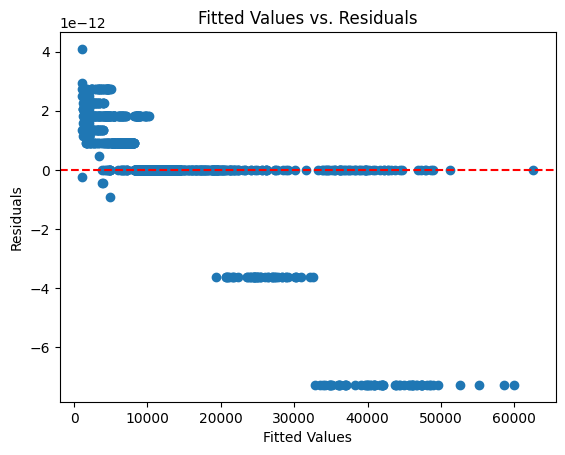

In [130]:
#plot
plt.scatter(fitted_values, residuals)
plt.axhline(y=0, color='r', linestyle='--')
plt.xlabel('Fitted Values')
plt.ylabel('Residuals')
plt.title('Fitted Values vs. Residuals')

In [131]:
#least Squares
import statsmodels.api as sm
X_train_sm = sm.add_constant(X_train)
model_sm = sm.OLS(y_train, X_train_sm).fit()
print(model_sm.summary())

                            OLS Regression Results                            
Dep. Variable:               expenses   R-squared:                       1.000
Model:                            OLS   Adj. R-squared:                  1.000
Method:                 Least Squares   F-statistic:                 2.824e+34
Date:                Fri, 08 Nov 2024   Prob (F-statistic):               0.00
Time:                        18:30:06   Log-Likelihood:                 27139.
No. Observations:                1070   AIC:                        -5.427e+04
Df Residuals:                    1068   BIC:                        -5.426e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       1.327e+04   7.15e-14   1.86e+17      0.0

In [132]:
#t-statitstic
print(model_sm.tvalues)

const    1.856140e+17
x1       1.680422e+17
dtype: float64


In [134]:
#weighted regression
from sklearn.linear_model import LinearRegression
from sklearn.utils.class_weight import compute_sample_weight
weights = compute_sample_weight('balanced', y_train)
model = LinearRegression()
model.fit(X_train, y_train, sample_weight=weights)
y_pred = model.predict(X_test)
mse = mean_squared_error(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
print("Mean Squared Error:", mse)
print("Mean Absolute Error:", mae)
print("R-squared:", r2)




Mean Squared Error: 6.0892684738453526e-24
Mean Absolute Error: 1.494897075115578e-12
R-squared: 1.0


In [135]:
#p-value
print(model_sm.pvalues)

const    0.0
x1       0.0
dtype: float64


In [137]:
#cross validateion
from sklearn.model_selection import cross_val_score
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import KFold
cross_val_score(model, X_train, y_train, cv=5)
cross_val_score(model, X_train, y_train, cv=5).mean()


1.0

In [139]:
#AIC
print(model_sm.aic)

-54273.80984214609


In [140]:
#BIC
print(model_sm.bic)

-54263.85901429118


In [143]:
#Mallows cp
from statsmodels.stats.diagnostic import het_breuschpagan # Changed het_malean to het_breuschpagan
print(het_breuschpagan(model_sm.resid, model_sm.model.exog))

(406.9856418377011, 1.6606597594320209e-90, 655.5825829887451, 3.972881574401804e-113)


In [144]:
#predication interval
print(model_sm.conf_int())

                  0             1
const  13270.422414  13270.422414
x1     12105.484979  12105.484979
